# Метод ближайших соседей

Это метод машинного обучения с учителем.
Это достаточно простой метод классификации, который иногда используется также для решения задач регрессии (т.е. позволяет предсказывать некоторое числовое значение)

Алгоритм:
- Вычислить расстояние до каждого из объектов обучающей выборки
- Отобрать k объектов обучающей выборки, расстояние до которых минимально
- Класс классифицируемого объекта — это класс, наиболее часто встречающийся среди k ближайших соседей


Под задачу регрессии метод адаптируется довольно легко – на 3 шаге возвращается не метка, а число – среднее (или медианное) значение целевого признака среди соседей.

SimpleKnnExample.png

# Масштабирование

Для большинства задач машинного обучения необходимо масштабировать признаки. Что это значит?

Условно говоря, чтобы признак "Зарплата" с диапазоном значений до 100 тысяч не вносил больший вклад в расстояние, чем "Возраст" со значениями до 100.

Для того чтобы н было такой диспропорции необходимо условно уронять признаки с помощью масштабирования.

Нормализация (normalization) и стандартизация (standardization) являются методами изменения диапазонов значений — шкалирования.

Нормализация и стандартизация отличаются своими подходами:
- Нормализация подразумевает изменение диапазонов в данных без изменения формы распределения,
- Стандартизация изменяет форму распределения данных (приводится к нормальному распределению).

- Нормализация обычно означает масштабирование значений в диапазон [0,1].
- Стандартизация обычно означает, что данные масштабирования имеют среднее значение 0 и стандартное отклонение 1 (единичная дисперсия).

# Практика

Датасет: https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
import pandas as pd

df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


- Какая размерность данных?
- Какое соотношение классов в выборке?
- Есть ли пустые значения в данных?
- Какая переменная является целевой? Какие переменные можем взять за признаки?

In [ ]:
print(df.shape)
print('_'*30)
print(df['Outcome'].value_counts())
print('_'*30)
print(df.isna().sum())

(768, 9)
______________________________
0    500
1    268
Name: Outcome, dtype: int64
______________________________
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Так как все переменные у нас разного диапазона, для наиболее эффективной классификации давайте их масштабируем.

1. Стандартизация:

StandardScaler - функция из библиотеки sklearn.preprocessing, которая позволяет стандартизировать признаки
2. Нормализация:

MinMaxScaler - функция из библиотеки sklearn.preprocessing, которая позволяет нормализовать признаки

Для начала выделите вектор признаков X и вектор ответов y.

In [ ]:
X = df.drop(['Outcome'], axis = 1)
y = df['Outcome']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_st = scaler.fit_transform(X)
# fit()
# transform()
X_st

# X - вектор признаков исходного набора
# X_st - вектор стандартизированных признаков
# X_norm - вектор нормализованных признаков

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler([0,1])
X_norm = scaler.fit_transform(X)
X_norm

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

Дальше для обучения нам необходимо разделить данные на тренировочные и тестовые.

Зачем?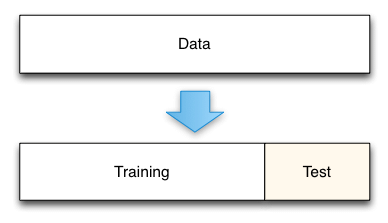

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_st, y, test_size=1/3, random_state=42)

Метод ближайщих соседей, реализован в библиотеке sklearn в модуле neighbors.

Для использования необходимо явным образом указывать сколько соседей необходимо учитывать (если не указывать по умолчанию будет 5)

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_scory

# создаем модель
# как подобрать лучшее число соседей?
scores = []
for i in range(1,15):

    knn = KNeighborsClassifier(i)
    # log = LogisticRegression()
    knn.fit(X_train,y_train)
    answers = knn.predict(X_test) # метод predict возвращыет вектор ответов для X_test
    
    scores.append(knn.score(X_test,y_test))
    # accuracy_score(y_test,answers)

print(scores)

[0.62109375, 0.67578125, 0.703125, 0.69921875, 0.6875, 0.69921875, 0.7265625, 0.69921875, 0.703125, 0.703125, 0.71484375, 0.71484375, 0.703125, 0.71484375]


In [ ]:
# для какого количества соседей оценка максимальна?
max_score = max(scores)
scores_ind = [i for i, v in enumerate(scores) if v == max_score]
scores_ind

[6]

In [ ]:
knn = KNeighborsClassifier(7)

# обучаем
knn.fit(X_train,y_train)

# предсказываем значения
y_pred = knn.predict(X_test)

accuracy_score(y_test,y_pred)

# 0 - общее 133+43
# 1 - общее37+43

array([[133,  37],
       [ 43,  43]])

Посчитайте acuracy, recall, precision можно вручную, можно с помощью методов sklearn.

Интерпретируйте полученные результаты.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

print("Accuracy:", accuracy_score(y_test,y_pred))
print("Recall:", recall_score(y_test,y_pred))
print("Precision:", precision_score(y_test,y_pred))

Accuracy: 0.6875
Recall: 0.5
Precision: 0.5375


# Домашнее задание

Берёре тот же датасет что и для логистической регрессии.

1. Для этого же набора данных реализуйте классифицируйте данные с помощью метода ближайщих соседей. Оцените модель и сравните с логистической регрессии.

2. Реализуйте оба алгоритма применив масштабирование данных.Оцените модельи и сравните их.

В выводе должны быть представлены оценки для четырех моделей:
- knn
- knn с применением масштабирования
- логистическая регрессия
- логистическая регрессия с применением масштабирования

Какая из 4х моделей показала наилучшую оценку?